In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from statistics import mean

from analysis_utils import get_df

In [2]:
identifier = '*'
df = get_df(identifier)

In [3]:
# df['target_anechoic_cyst_5mm_avg_cnr_dnn']
list(df)

['input_size',
 'output_size',
 'batch_norm',
 'use_pooling',
 'pooling_method',
 'conv1_kernel_size',
 'conv1_num_kernels',
 'conv1_stride',
 'conv1_dropout',
 'pool1_kernel_size',
 'pool1_stride',
 'conv2_kernel_size',
 'conv2_num_kernels',
 'conv2_stride',
 'conv2_dropout',
 'pool2_kernel_size',
 'pool2_stride',
 'fcs_hidden_size',
 'fcs_num_hidden_layers',
 'fcs_dropout',
 'cost_function',
 'optimizer',
 'learning_rate',
 'data_is_target',
 'data_train',
 'data_val',
 'batch_size',
 'data_noise_gaussian',
 'weight_decay',
 'patience',
 'cuda',
 'save_initial',
 'k',
 'save_dir',
 'name',
 'loss_val_k_3',
 'loss_val_k_4',
 'loss_val_k_5',
 'target_in_vivo_target_17_cnr_das',
 'target_in_vivo_target_17_cnr_dnn',
 'target_in_vivo_target_19_cnr_das',
 'target_in_vivo_target_19_cnr_dnn',
 'target_in_vivo_avg_cnr_das',
 'target_in_vivo_avg_cnr_dnn',
 'target_anechoic_cyst_5mm_target_5_SNR_10dB_cnr_das',
 'target_anechoic_cyst_5mm_target_5_SNR_10dB_cnr_dnn',
 'target_anechoic_cyst_5mm_tar

# (TODO) Filtering: Only Consider 

# CNR: CNNs vs DNNs vs DAS (simulation)

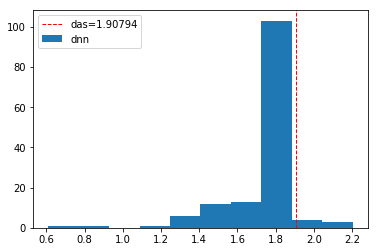

In [9]:
cnr_das = df.loc[0, 'target_anechoic_cyst_5mm_avg_cnr_das']
plt.hist(df['target_anechoic_cyst_5mm_avg_cnr_dnn'], label='dnn')
plt.axvline(cnr_das, color='red', linestyle='dashed', linewidth=1, label='das='+str(cnr_das))
plt.legend()
plt.show()

# CNR: Simulation vs Phantom

In [ ]:
# m = 1 # m=1 is CNR

# is_labeling_points = True

# x = speckle_stats_dnn_cyst[:, m, :].mean(axis=-1)
# y = speckle_stats_dnn_phantom[:, m, :].mean(axis=-1)
# fig, ax = plt.subplots()
# ax.scatter(x, y)

# if is_labeling_points == True:
#     for i, annotation in enumerate(range(len(x))):
#         ax.annotate(annotation, (x[i], y[i]), size=11)


# ax.grid()
# ax.set_title('Simulation CNR vs Phantom CNR, Same Model (Cluster)')
# ax.set_xlabel('Simulation CNR')
# ax.set_ylabel('Phantom CNR')
# plt.show()

df.plot(x='col_name_1', y='col_name_2', style='o')


# CNR: Simulation vs In vivo

In [ ]:
# Simulation vs In vivo

fig, ax = plt.subplots()
x = speckle_stats_dnn_cyst[:, m, :].mean(axis=-1)
y = speckle_stats_dnn_in_vivo[:, m, :].mean(axis=-1)

ax.scatter(x, y)

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(x))):
        ax.annotate(annotation, (x[i],y[i]), size=11)
    
    
ax.grid()
ax.set_title('Simulation CNR vs In Vivo CNR, Same Model (Cluster)')
ax.set_xlabel('Simulation CNR')
ax.set_ylabel('In Vivo CNR')
plt.show()

# Phantom vs In vivo

In [ ]:
# # Simulation vs In vivo

fig, ax = plt.subplots()

x = speckle_stats_dnn_phantom[:, m, :].mean(axis=-1)
y = speckle_stats_dnn_in_vivo[:, m, :].mean(axis=-1)

ax.scatter(x, y)

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(x))):
        ax.annotate(annotation, (x[i],y[i]), size=11)
    
ax.grid()
ax.set_title('Phantom CNR vs In Vivo CNR, Same Model (Cluster)')
ax.set_xlabel('Phantom CNR')
ax.set_ylabel('In Vivo CNR')
plt.show()

# CNR vs Hyperparams

In [ ]:
# # Simulated Cyst CNR vs Model Params

hyperparams = [ \
 'batch_norm',
 'conv1_kernel_size',
 'conv1_num_kernels',
 'conv1_stride',
 'conv1_dropout',
               
 'pool1_kernel_size',
 'pool1_stride',
               
 'conv2_kernel_size',
 'conv2_num_kernels',
 'conv2_stride',
 'conv2_dropout',
               
 'pool2_kernel_size',
 'pool2_stride',
               
 'fcs_hidden_size',
 'fcs_dropout',
 'fcs_num_hidden_layers',
               
               
#  'data_is_target',
 'data_noise_gaussian',
#  'data_train',
#  'data_val',
#  'k',
#  'patience',
#  'save_initial',
#  'weight_decay',
#  'batch_size',
 'loss_val_k_3',
 'loss_val_k_4',
 'loss_val_k_5',
          
 'learning_rate',
 'optimizer',
 'momentum',
]



# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

mean_cnr_cyst = speckle_stats_dnn_cyst[:, 1, :].mean(axis=-1)
df['mean_cnr_cyst'] = mean_cnr_cyst

mean_cnr_phantom = speckle_stats_dnn_phantom[:, 1, :].mean(axis=-1)
df['mean_cnr_phantom'] = mean_cnr_phantom

mean_cnr_in_vivo = speckle_stats_dnn_in_vivo[:, 1, :].mean(axis=-1)
df['mean_cnr_in_vivo'] = mean_cnr_in_vivo


In [ ]:
max_cnr = df['mean_cnr_cyst'].idxmax()
print(max_cnr)
max_row = df[max_cnr:max_cnr+1]
max_row.index = [0]

In [ ]:
def plot_cnr_hyperparameters(df, column_of_interest, ylim=(0, 6), plot_method='scatter'):
    number_of_subplots = len(hyperparams)
    ncols = 4
    nrows = number_of_subplots // ncols 
    nrows += number_of_subplots % ncols

    # Create a Position index
    position = range(1, number_of_subplots + 1)

    fig = plt.figure(1, figsize=(20, 40))

    for i, column in enumerate(df[hyperparams]):
        ax = fig.add_subplot(nrows, ncols, position[i])
        if plot_method == 'scatter':
            ax.scatter(df_dropout[column], df[column_of_interest], color='blue')
#             ax.scatter(df_no_dropout[column], df_no_dropout[column_of_interest], color='red')
        else:
            possible_column_values = df_dropout_and_no_dropout[column].unique()
            print('df_dropout[%s] =' % column, df_dropout[column])
            print('df_no_dropout[%s] =' % column, df_no_dropout[column])
#             ax.bar(['with dropout', 'without dropout'], [df_dropout[column][0], df_no_dropout[column][0]])
            ax.bar(possible_column_values, )
        ax.set_ylabel('cnr')
        ax.set_xlabel(column)
        if ylim: ax.set_ylim(*ylim)

    plt.show()

# Picking High CNR, Low Speckle SNR Models - Simulation

In [ ]:
cnr = 1 # m=1 is CNR
speckle_snr = 2
das_avg_cnr_simulation = mean([5.09, 4.9138, 5.148, 4.8877, 5.0831])
das_avg_speckle_snr_simulation = mean([1.9281, 1.8777, 1.9231, 1.8922, 1.9186])

is_labeling_points = True

cnr_simulation = speckle_stats_dnn_cyst[:, cnr, :].mean(axis=-1)
speckle_snr_simulation = speckle_stats_dnn_cyst[:, speckle_snr, :].mean(axis=-1)

fig, ax = plt.subplots()
ax.scatter(cnr_simulation, speckle_snr_simulation, color='blue', label='dnn')
ax.scatter(das_avg_cnr_simulation, das_avg_speckle_snr_simulation, color='red', label='das')

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(cnr_simulation))):
        ax.annotate(annotation, (cnr_simulation[i], speckle_snr_simulation[i]), size=11)


ax.legend()    
ax.grid()
ax.set_title('CNR vs Speckle SNR - Simulation')
ax.set_xlabel('cnr')
ax.set_ylabel('speckle snr')
plt.show()

# Picking High CNR, Low Speckle SNR Models - Phantom

In [ ]:
cnr = 1 # m=1 is CNR
speckle_snr = 2
das_avg_cnr_phantom = mean([4.3994, 3.7869, 4.5012, 4.7083, 3.804])
das_avg_speckle_snr_phantom = mean([1.9298, 1.8478, 1.9997, 2.0478, 1.8886])

is_labeling_points = True

cnr_phantom = speckle_stats_dnn_phantom[:, cnr, :].mean(axis=-1)
speckle_snr_phantom = speckle_stats_dnn_phantom[:, speckle_snr, :].mean(axis=-1)

fig, ax = plt.subplots()
ax.scatter(cnr_phantom, speckle_snr_phantom, color='blue', label='dnn')
ax.scatter(das_avg_cnr_phantom, das_avg_speckle_snr_phantom, color='red', label='das')

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(cnr_phantom))):
        ax.annotate(annotation, (cnr_phantom[i], speckle_snr_phantom[i]), size=11)


ax.legend()    
ax.grid()
ax.set_title('CNR vs Speckle SNR - Phantom')
ax.set_xlabel('cnr')
ax.set_ylabel('speckle snr')
plt.show()

# Picking High CNR, Low Speckle SNR Models - In Vivo

In [ ]:
cnr = 1 # m=1 is CNR
speckle_snr = 2
das_avg_cnr_in_vivo = mean([-14.982, 4.2585])
das_avg_speckle_snr_in_vivo = mean([1.8672, 1.9078])

is_labeling_points = True

cnr_in_vivo = speckle_stats_dnn_in_vivo[:, cnr, :].mean(axis=-1)
speckle_snr_in_vivo = speckle_stats_dnn_in_vivo[:, speckle_snr, :].mean(axis=-1)

fig, ax = plt.subplots()
ax.scatter(cnr_in_vivo, speckle_snr_in_vivo, color='blue', label='dnn')
ax.scatter(das_avg_cnr_in_vivo, das_avg_speckle_snr_in_vivo, color='red', label='das')

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(cnr_in_vivo))):
        ax.annotate(annotation, (cnr_in_vivo[i], speckle_snr_in_vivo[i]), size=11)


ax.legend()    
ax.grid()
ax.set_title('CNR vs Speckle SNR - In Vivo')
ax.set_xlabel('cnr')
ax.set_ylabel('speckle snr')
plt.show()

# Picking Models With Better CNR, Lower Speckle SNR than DAS

In [ ]:
speckle_snr_tolerance = 0.1

all_three = [index for index, (s_cnr, s_speckle, p_cnr, p_speckle, i_cnr, i_speckle) in enumerate(zip(cnr_simulation, speckle_snr_simulation, cnr_phantom, speckle_snr_phantom, cnr_in_vivo, speckle_snr_in_vivo))
    if s_cnr > das_avg_cnr_simulation and s_speckle > das_avg_speckle_snr_simulation - speckle_snr_tolerance and s_speckle < das_avg_speckle_snr_simulation + speckle_snr_tolerance
        and p_cnr > das_avg_cnr_phantom and p_speckle > das_avg_speckle_snr_phantom - speckle_snr_tolerance and p_speckle < das_avg_speckle_snr_phantom + speckle_snr_tolerance
        and i_cnr > das_avg_cnr_in_vivo and i_speckle > das_avg_speckle_snr_in_vivo - speckle_snr_tolerance and i_speckle < das_avg_speckle_snr_in_vivo + speckle_snr_tolerance
]

consistent = [index for index, (s_cnr, s_speckle, p_cnr, p_speckle, i_cnr, i_speckle) in enumerate(zip(cnr_simulation, speckle_snr_simulation, cnr_phantom, speckle_snr_phantom, cnr_in_vivo, speckle_snr_in_vivo))
    if s_cnr > das_avg_cnr_simulation and s_speckle < das_avg_speckle_snr_simulation + speckle_snr_tolerance
        and p_cnr > das_avg_cnr_phantom and p_speckle < das_avg_speckle_snr_phantom + speckle_snr_tolerance
        and i_cnr > das_avg_cnr_in_vivo and i_speckle < das_avg_speckle_snr_in_vivo + speckle_snr_tolerance
]

In [ ]:
df.iloc[all_three]['name']

# 3. Consistent Models Only

In [ ]:
cnr = 1 # m=1 is CNR
speckle_snr = 2
das_avg_cnr_in_vivo = mean([-14.982, 4.2585])
das_avg_speckle_snr_in_vivo = mean([1.8672, 1.9078])

is_labeling_points = True

cnr_in_vivo = speckle_stats_dnn_in_vivo[:, cnr, :].mean(axis=-1)
speckle_snr_in_vivo = speckle_stats_dnn_in_vivo[:, speckle_snr, :].mean(axis=-1)

fig, ax = plt.subplots()
ax.scatter(cnr_in_vivo, speckle_snr_in_vivo, color='blue', label='dnn')
ax.scatter(das_avg_cnr_in_vivo, das_avg_speckle_snr_in_vivo, color='red', label='das')

if is_labeling_points == True:
    for i, annotation in enumerate(range(len(cnr_in_vivo))):
        ax.annotate(annotation, (cnr_in_vivo[i], speckle_snr_in_vivo[i]), size=11)


ax.legend()    
ax.grid()
ax.set_title('CNR vs Speckle SNR - In Vivo')
ax.set_xlabel('cnr')
ax.set_ylabel('speckle snr')
plt.show()

In [ ]:
df.iloc[[56]]['name']

In [ ]:
df.iloc[[41]]['name'] # Use this for in vivo

In [ ]:
df.iloc[[2]]['name']

In [ ]:
df.iloc[[39]]['name']

In [ ]:
cnr_phantom[2]

In [ ]:
import matplotlib.image as mpimg
import os

model_name = '20180705164352_21_evaluated'
model_folder = os.path.join('..', 'DNNs', model_name)

def inspect_by_name(model_name):
    f, axes = plt.subplots(1,2)
    plt.axis('off')
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_17', 'das.png'))
    imgplot = axes[0].imshow(img)
    
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_17', 'dnn.png'))
    imgplot = axes[1].imshow(img)
    
    f, axes = plt.subplots(1,2)
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_19', 'das.png'))
    imgplot = axes[0].imshow(img)
    axes[0]
    
    img = mpimg.imread(os.path.join(model_folder, 'scan_batteries', 'target_in_vivo', 'target_19', 'dnn.png'))
    imgplot = axes[1].imshow(img)
    
    plt.subplots_adjust(wspace=0, hspace=0)

    
    plt.show()
    

In [ ]:
inspect_by_name(model_name)